# Open Images in Python.

### Using PIL, Python Imaging Library  
#### to install pillow, pip install Pillow 

In [2]:
image_path = r"images\\"
image_name = 'Neuron.jpg'

In [3]:
from PIL import Image 
import numpy as np   #Use numpy to convert images to arrays
%matplotlib inline

type of image is : <class 'PIL.JpegImagePlugin.JpegImageFile'>
format of image is : JPEG
mode of image is : RGB
type of image after converting to array is : <class 'numpy.ndarray'>


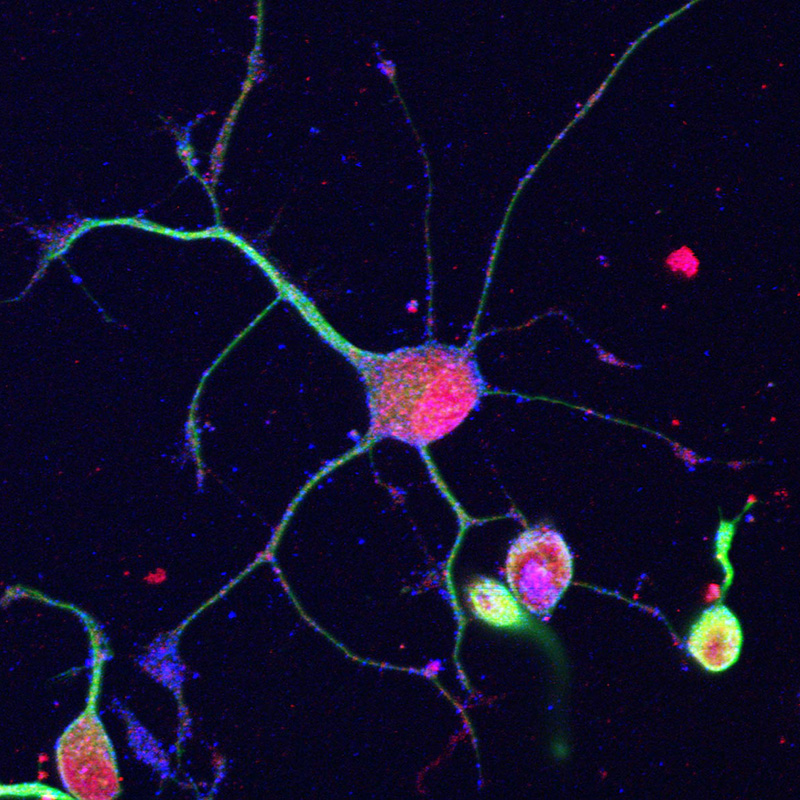

In [4]:
# Read image 
img = Image.open(image_path + image_name) #Not a numpy array
print('type of image is :',type(img))      # prints type of image
print('format of image is :',img.format)   # prints format of image 
print('mode of image is :',img.mode)       # prints mode of image 

#PIL is not by default numpy array but can convert PIL image to numpy array. 
img1 = np.asarray(img)
print('type of image after converting to array is :',type(img1))

# Output Images 
# img.show()     # show image in Windows
display(img)

### Using Matplotlib
#### to install matplotlib, pip install matplotlib 

type of image is : <class 'numpy.ndarray'>
shape of image is : (800, 800, 3)


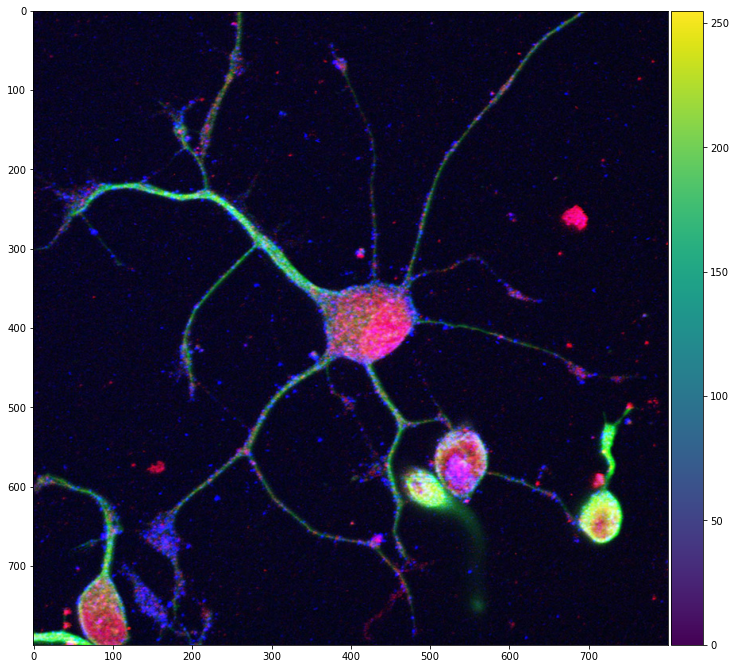

In [5]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

img = mpimg.imread(image_path + image_name)  #this is a numpy array
print('type of image is :',type(img))
print('shape of image is :',img.shape)

fig  = plt.figure(figsize=(12,18))
ax = plt.gca()
im = ax.imshow(img)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

### Using scikit image 
#### to install matplotlib, pip install scikit-image 

shape of image is : (800, 800, 3)


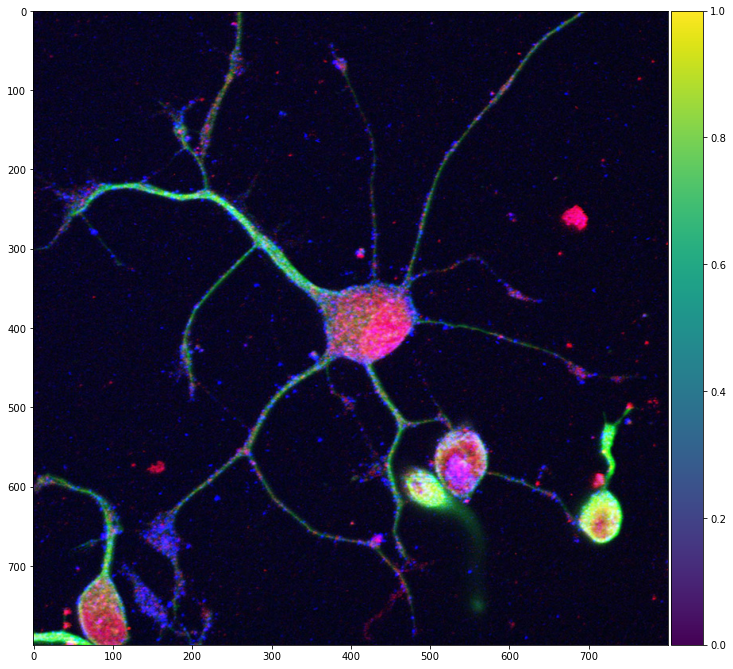

In [6]:
from skimage import io, img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt 


image = img_as_float(io.imread(image_path + image_name) )

#image2 = io.imread("images/test_image.jpg").astype(np.float)
#avoid using astype as it violates assumptions about dtype range.
#for example float should range from 0 to 1 (or -1 to 1) but if you use 
#astype to convert to float, the values do not lie between 0 and 1. 
print('shape of image is :',image.shape)
fig  = plt.figure(figsize=(12,18))
ax = plt.gca()
im = ax.imshow(image)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

#print(image)

#print(image2)
#image8byte = img_as_ubyte(image)
#print(image8byte)

### Using openCV
#### to install open CV : pip install opencv-python

In [11]:
import cv2
import matplotlib.pyplot as plt
#==============================================================================

grey_img = cv2.imread(image_path + image_name, 0)      # 0 for gray sacale
color_img = cv2.imread(image_path + image_name, 1)     # 1 for RGB Mode

#images opened using cv2 are numpy arrays
print(type(grey_img)) 
print(type(color_img)) 

# Use the function cv2.imshow() to display an image in a window. 
# First argument is the window name which is a string. second argument is our image. 
cv2.imshow("pic", grey_img)
cv2.imshow("color pic", color_img)

# Maintain output window until 
# user presses a key or 1000 ms (1s)
cv2.waitKey(0)          

#destroys all windows created
cv2.destroyAllWindows() 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'HSV Mode')

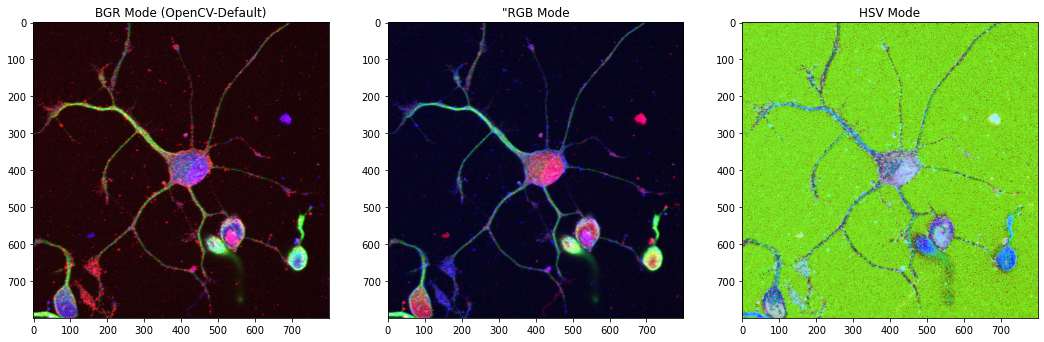

In [17]:
#OpenCV imread, imwrite and imshow all work with the BGR order, not RGB
#but there is no need to change the order when you read an image with 
#cv2.imread and then want to show it with cv2.imshow
#if you use matplotlib, it uses RGB. 
import matplotlib.pyplot as plt


#OpenCV represents RGB images as multi-dimensional NumPy arrays, but as BGR.
fig = plt.figure(figsize=(18,12))
plt.subplot(1, 3, 1)
plt.imshow(color_img)  
plt.title('BGR Mode (OpenCV-Default)')

plt.subplot(1, 3, 2)
#we can convert the images from BGR to RGB
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.title('"RGB Mode')

plt.subplot(1, 3, 3)
#We can also change color spaces from RGB to HSV..
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV))
plt.title('HSV Mode')


### Reading OME-TIFF using apeer_ometiff_library
#### pip install apeer-ometiff-library

In [23]:
from apeer_ometiff_library import io  #Use apeer.com free platform for image processing in the cloud

#Unwrap image and embedded xml metadata
(pic2, omexml) = io.read_ometiff(image_path + 'test_image.ome.tif')  
print (pic2.shape)   #to verify the shape of the array
print(omexml)
pic3 = pic2[0,0,:,:,:]
#plt.imshow(pic2[0,0,:,:,:])  

(1, 1, 3, 513, 639)
<?xml version="1.0" encoding="UTF-8" standalone="no"?><!-- Warning: this comment is an OME-XML metadata block, which contains crucial dimensional parameters and other important metadata. Please edit cautiously (if at all), and back up the original data before doing so. For more information, see the OME-TIFF web site: https://docs.openmicroscopy.org/latest/ome-model/ome-tiff/. --><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" Creator="OME Bio-Formats 5.8.1" UUID="urn:uuid:338c3175-9da3-4ffd-9f8a-94f81e622c85" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><Image ID="Image:0"><Pixels DimensionOrder="XYCZT" ID="Pixels:0" PhysicalSizeX="1.0" PhysicalSizeXUnit="µm" PhysicalSizeY="1.0" PhysicalSizeYUnit="µm" PhysicalSizeZ="1.0" PhysicalSizeZUnit="µm" SizeC="3" SizeT="1" SizeX="639" SizeY="513" SizeZ="1" TimeIncrement="0.0"

### reading czi files
#### pip install czifile 

(1, 1, 3, 1104, 1376, 1)
(1, 1, 3, 1104, 1376, 1)
(3, 1104, 1376)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


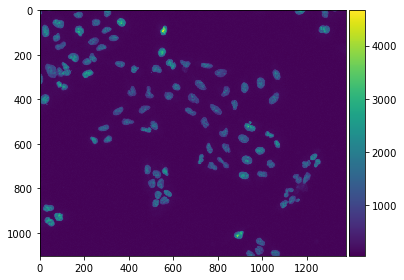

In [26]:
import czifile

img = czifile.imread(image_path + 'Osteosarcoma_01.czi')
print(img.shape)


import czifile
from skimage import io

img = czifile.imread(image_path + 'Osteosarcoma_01.czi')
print(img.shape)
img1=img[0, 0, :, :, :, 0]
print(img1.shape)
img2=img1[2,:,:]
io.imshow(img2)